In [24]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
#sns.set_context('notebook')

In [25]:
# File is stored in github repository for easiness of access
INPUT_FILE_PATH = '/content/water_potability.csv'

# Read the csv file from the url
df = pd.read_csv(INPUT_FILE_PATH)

# Print the first 5 rows of the dataframe
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
print(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [27]:
# Display the transposed DataFrame in tabular format
from IPython.display import display

# Transpose the description to match the structure
transposed_description = df.describe().T

# Use display to output it in table format
display(transposed_description)

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [28]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the result
print(null_counts)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


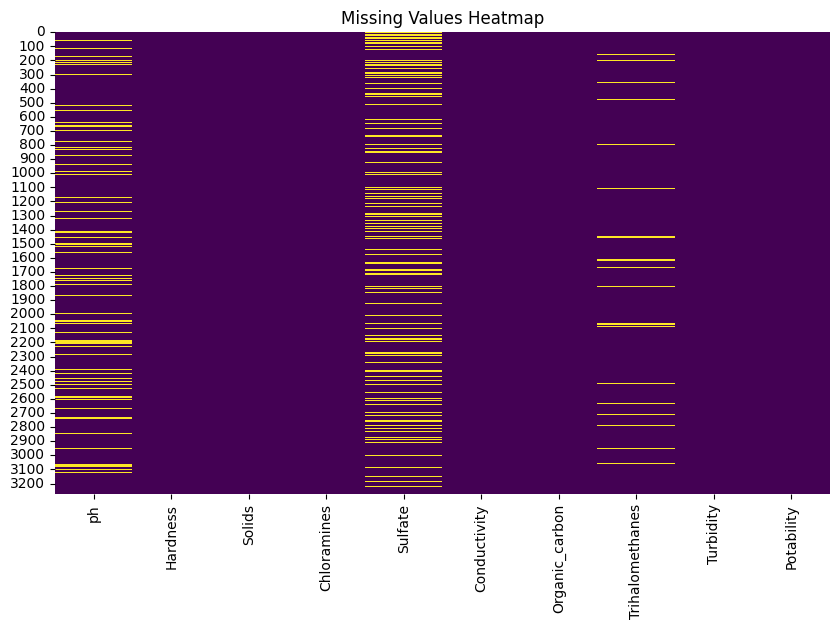

In [29]:
# Plot missing values using seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Mean of ph column: 7.080794504276836
Median of ph column: 7.080794504276835
Skewness of ph column: 0.027795881574044657
Skewness is low. Mean imputation can be considered.


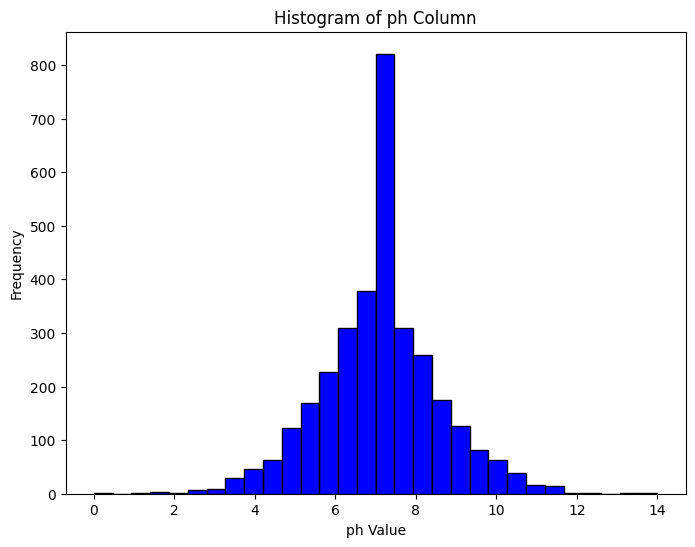

In [48]:
# Calculate the mean, median, and skewness of the ph column
ph_mean = df['ph'].mean()
ph_median = df['ph'].median()
ph_skewness = df['ph'].skew()

# Print the mean, median, and skewness
print(f"Mean of ph column: {ph_mean}")
print(f"Median of ph column: {ph_median}")
print(f"Skewness of ph column: {ph_skewness}")

# Check skewness and recommend imputation method
if abs(ph_skewness) < 0.5:
    print("Skewness is low. Mean imputation can be considered.")
else:
    print("Skewness is significant. Consider other imputation methods.")

# Plot the histogram of the ph column
plt.figure(figsize=(8, 6))
plt.hist(df['ph'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Histogram of ph Column')
plt.xlabel('ph Value')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Impute missing ph values with the mean
df['ph'].fillna(ph_mean, inplace=True)

Mean of Sulfate column: 333.7757766108135
Median of Sulfate column: 333.073545745888


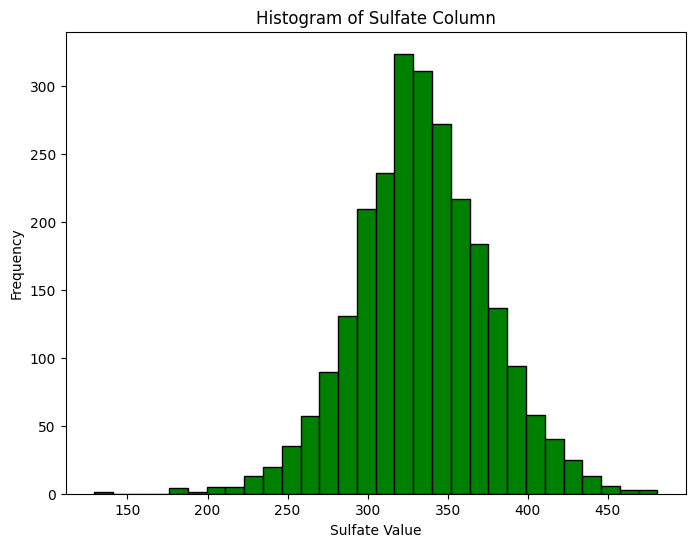

In [32]:
# Calculate the mean and median of the Sulfate column
sulfate_mean = df['Sulfate'].mean()
sulfate_median = df['Sulfate'].median()

# Print the mean and median
print(f"Mean of Sulfate column: {sulfate_mean}")
print(f"Median of Sulfate column: {sulfate_median}")

# Plot the histogram of the Sulfate column
plt.figure(figsize=(8, 6))
plt.hist(df['Sulfate'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Histogram of Sulfate Column')
plt.xlabel('Sulfate Value')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Impute missing Sulfate values with the mean
df['Sulfate'].fillna(sulfate_mean, inplace=True)

Trihalomethanes column:
Mean: 66.39629294676803
Median: 66.62248509808484


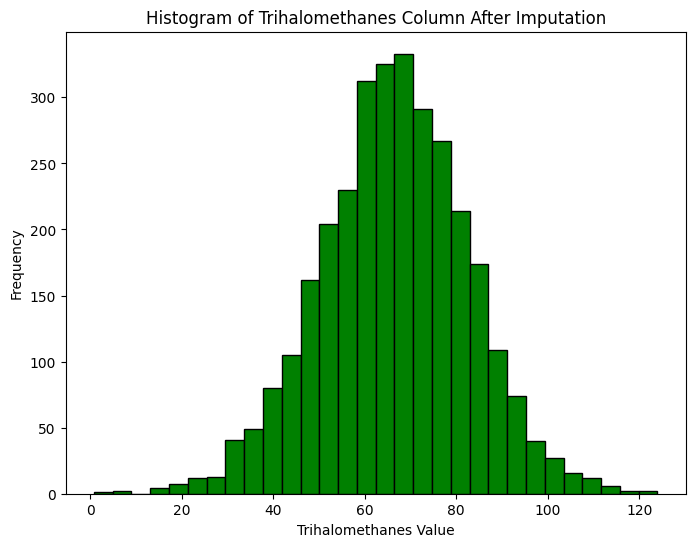

In [34]:
# Analyze Trihalomethanes column
trihalomethanes_mean = df['Trihalomethanes'].mean()
trihalomethanes_median = df['Trihalomethanes'].median()

# Print Trihalomethanes analysis
print(f"Trihalomethanes column:")
print(f"Mean: {trihalomethanes_mean}")
print(f"Median: {trihalomethanes_median}")

# Plot the histogram for Trihalomethanes
plt.figure(figsize=(8, 6))
plt.hist(df['Trihalomethanes'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Trihalomethanes Column After Imputation')
plt.xlabel('Trihalomethanes Value')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Impute missing Trihalomethanes values with the mean
df['Trihalomethanes'].fillna(trihalomethanes_mean, inplace=True)

Number of outliers in each column:
ph: 142
Hardness: 83
Solids: 47
Chloramines: 61
Sulfate: 264
Conductivity: 11
Organic_carbon: 25
Trihalomethanes: 54
Turbidity: 19
Potability: 0

Outlier values for each column:
ph outliers: [ 3.71608008 11.18028447  3.44506186 10.43329098  3.64162978 10.68296643
 10.56074464  3.51454553  3.72250049  1.84453837  2.61203591  3.38809061
 10.30847766 11.18069466  3.71979164 11.26782838  3.66471056 13.17540172
 10.7618978  10.35611883  3.88263108 11.301794    3.65712313  3.55157918
  2.7985491  10.27244427 10.46450248 10.31640038  3.84120504  3.41035967
 10.50966863  3.62316585  1.75703712  3.68107627  3.63316283 10.2684305
  0.22749905  3.42645037 10.53809844 11.89807803 10.26841472 10.90507641
  0.98991221 10.69553249 10.63290961 10.28206797 10.67805626 10.38613293
 10.8112895  10.58138599 11.02787986  3.34458853 10.77431809 10.41504401
 11.24450714 10.48680842  3.79212573  3.63717063 10.55027327  2.69083124
  3.78304364  3.84681433  3.43387406 12.24692

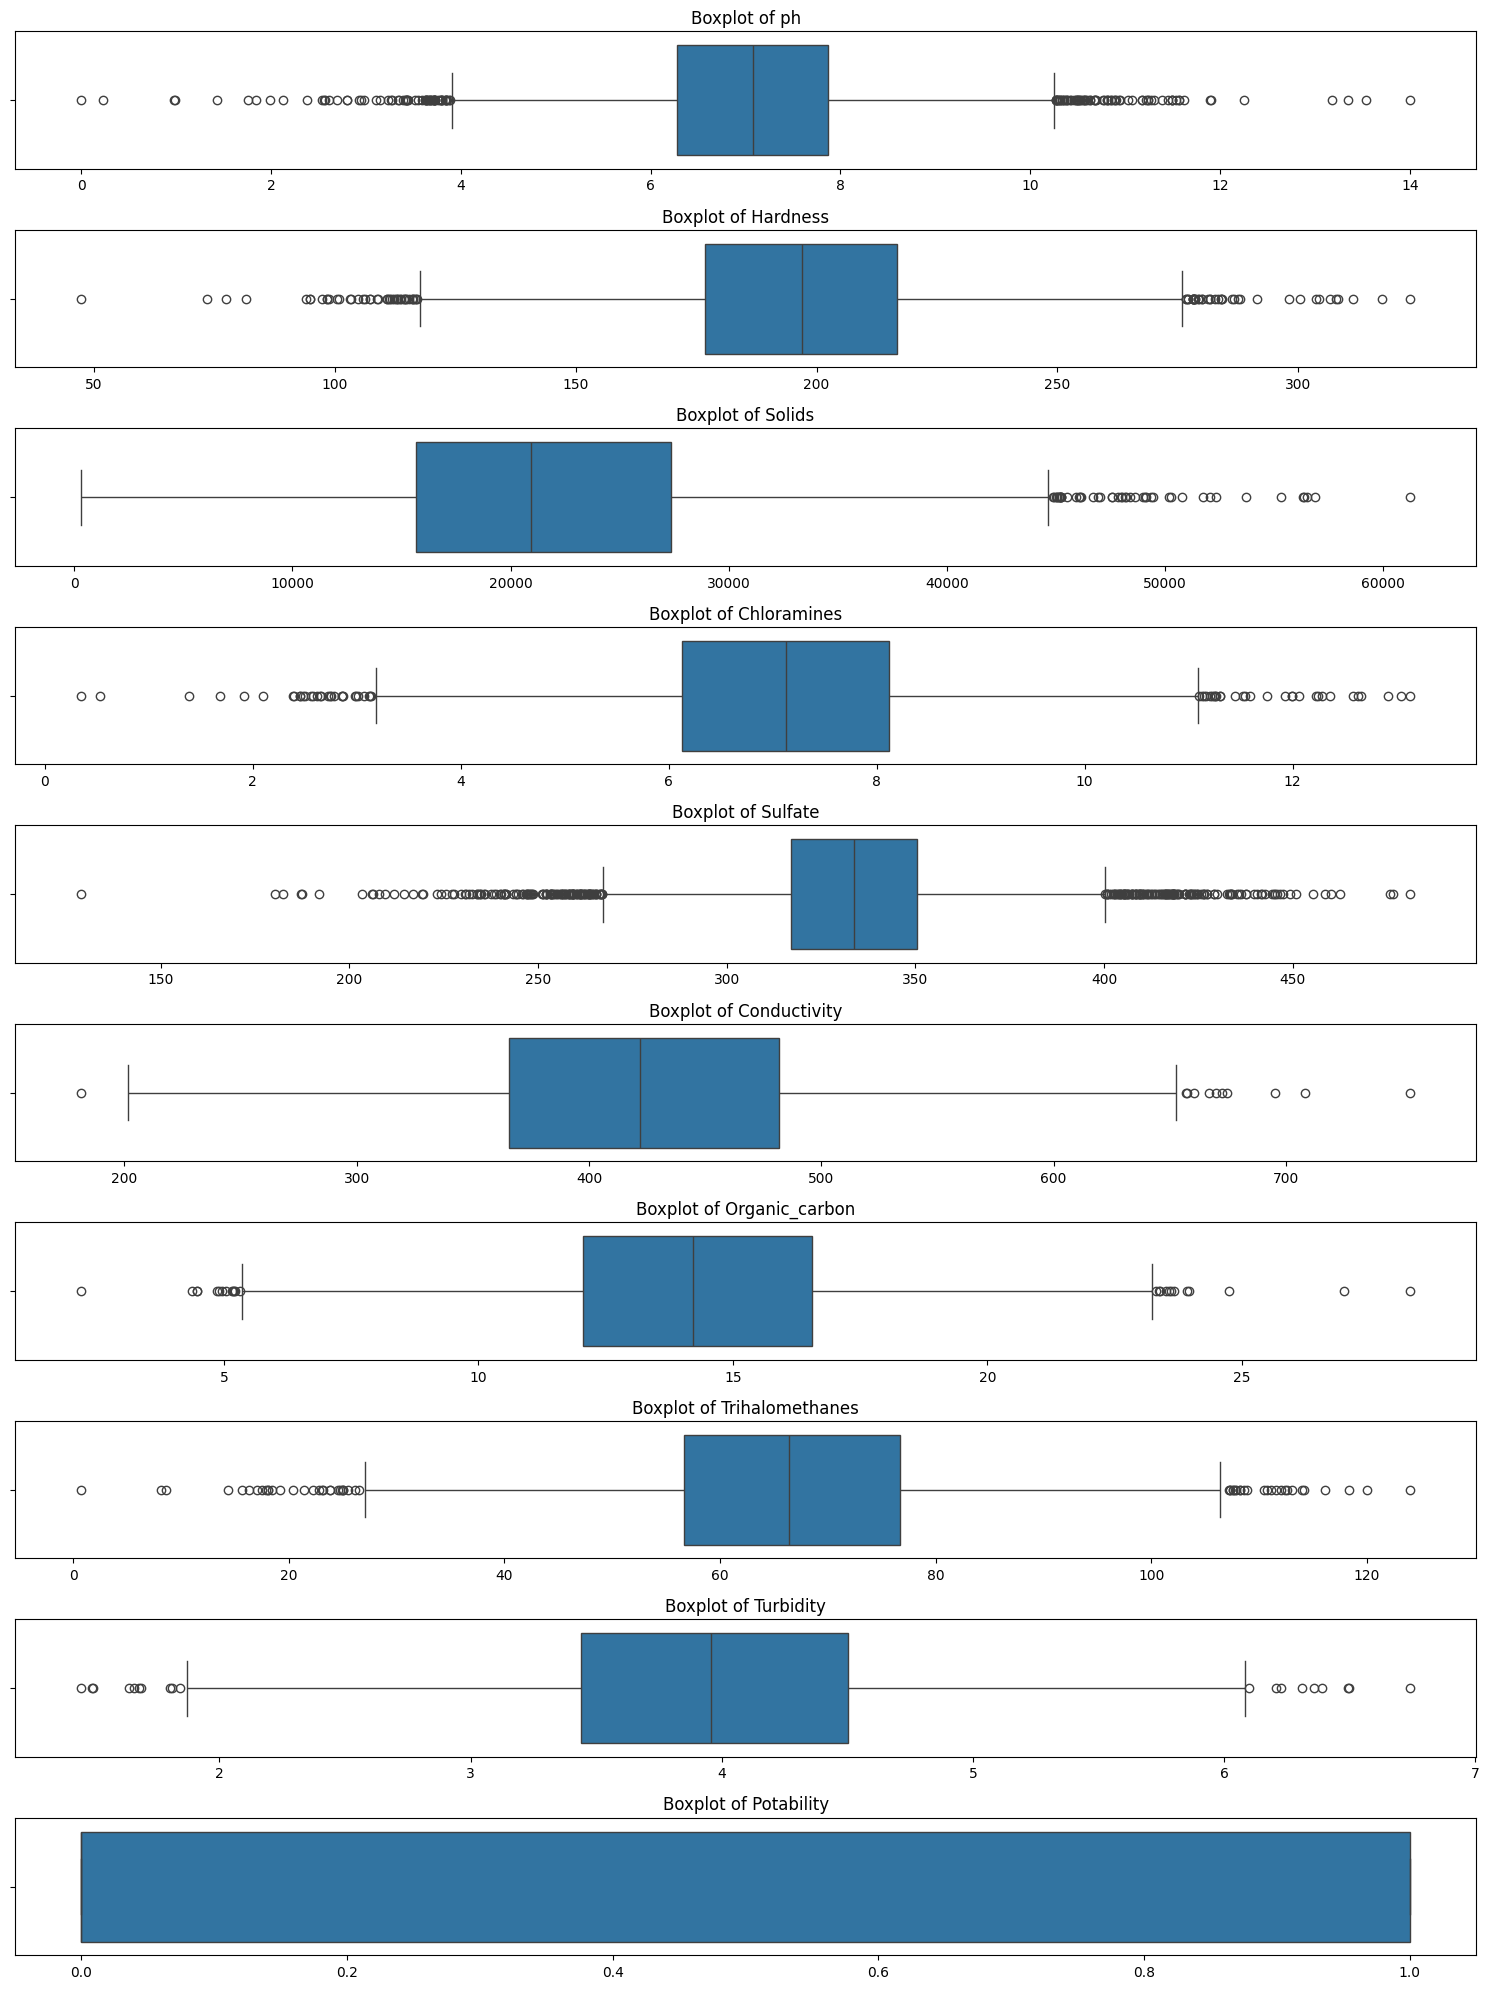

In [37]:
# Function to detect outliers using IQR method and display the outliers themselves
def detect_outliers_iqr(df):
    outliers = {}
    outlier_values = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers and count them
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()

        # Store the actual outlier values
        outlier_values[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].values

    return outliers, outlier_values

# Example: Detect outliers in the dataset
outliers, outlier_values = detect_outliers_iqr(df)

# Print the number of outliers for each column
print("Number of outliers in each column:")
for column, count in outliers.items():
    print(f"{column}: {count}")

# Print the actual outlier values for each column
print("\nOutlier values for each column:")
for column, values in outlier_values.items():
    print(f"{column} outliers: {values}\n")

# Importing the necessary libraries for plotting
# Set the figure size for better visibility
plt.figure(figsize=(15, 20))

# Loop through each numeric column and plot the boxplot individually
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['float64', 'int64']).columns), 1, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')  # Remove x-label for better formatting

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


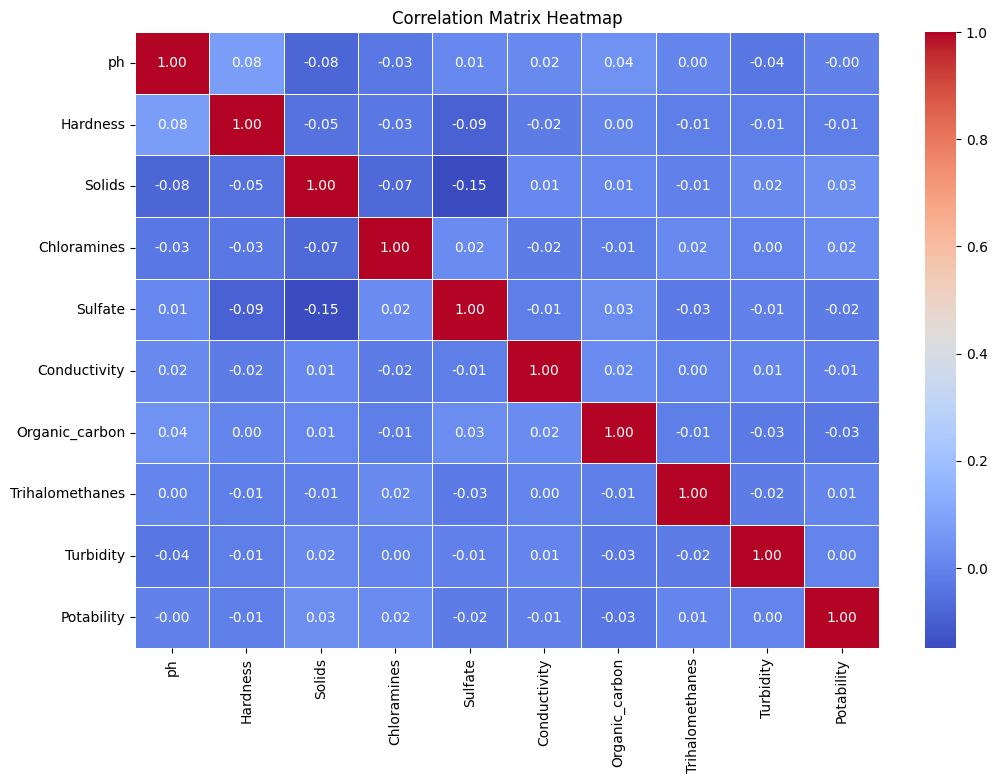

In [38]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix in tabular format
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
# Identify skewness for each numeric column
skewness = df.skew()

# Display skewness for each column
print("Skewness for each column:")
print(skewness)

# Filter out columns that are skewed (using a threshold, e.g., skewness > 1 or skewness < -1)
skewed_columns = skewness[abs(skewness) > 1]

# Check if there are any significantly skewed columns and print the appropriate message
if skewed_columns.empty:
    print("\nThere are no significantly skewed columns in the data.")
else:
    print("\nThe following columns are significantly skewed:")
    print(skewed_columns)

# Display the number of skewed columns
print(f"\nNumber of skewed columns: {len(skewed_columns)}")

Skewness for each column:
ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64

There are no significantly skewed columns in the data.

Number of skewed columns: 0


In [40]:
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [41]:
# Feature transformation
# scale the numeric columns
# After transformation print the dataframe head

from sklearn.preprocessing import RobustScaler


# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the scaler to all columns except the 'Potability' column
scaled_data = scaler.fit_transform(df.drop(columns=['Potability']))

# Convert the scaled data back into a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])

# Add the 'Potability' column back (it should not be scaled)
scaled_df['Potability'] = df['Potability'].values

# Display the scaled dataframe in a nice tabular format
from IPython.display import display
display(scaled_df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,0.198981,-0.011702,0.085492,1.043542,1.227178,-0.854560,1.028759,-0.935210,0
1,-2.113014,-1.696382,-0.196962,-0.249088,0.000000,1.473406,0.214093,-0.502884,0.514449,0
2,0.639503,0.684850,-0.087287,1.079558,0.000000,-0.028251,0.590024,0.001189,-0.847715,0
3,0.776180,0.437145,0.093483,0.467446,0.694190,-0.505079,0.939076,1.695662,0.635242,0
4,1.263161,-0.398477,-0.252771,-0.293690,-0.710100,-0.202262,-0.592197,-1.718287,0.113188,0


In [42]:
# Save the cleaned and transformed dataset to a CSV file
df.to_csv('/content/cleaned_water_potability.csv', index=False)

# Download the file in Google Colab
from google.colab import files
files.download('/content/cleaned_water_potability.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Hypothesis Testing

from scipy import stats

# Extract the relevant columns
ph = df['ph']
solids = df['Solids']

# Perform the t-test for the hypothesis
t_stat, p_value = stats.ttest_ind(ph, solids)

# Output the results
print(f"Ttest_indResult(statistic={t_stat}, pvalue={p_value})")

# Interpret the p-value
if p_value < 0.05:
    print("The p-value is less than 0.05, so we are rejecting the null hypothesis at 5% significance level.")
else:
    print("The p-value is greater than 0.05, so we fail to reject the null hypothesis at 5% significance level.")


Ttest_indResult(statistic=-143.64952725440097, pvalue=0.0)
The p-value is less than 0.05, so we are rejecting the null hypothesis at 5% significance level.


Missing values in each column:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


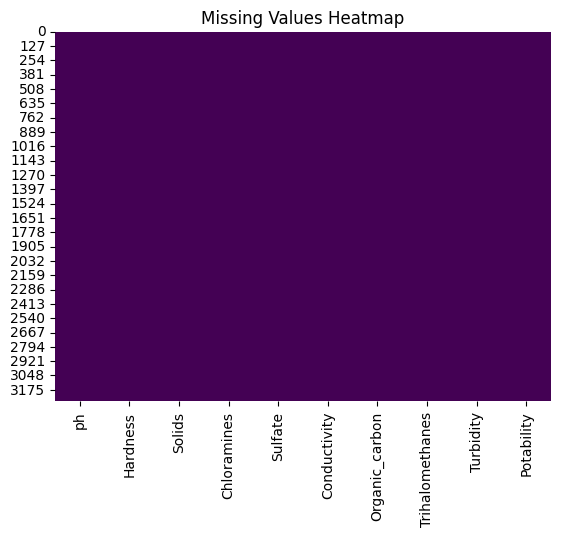

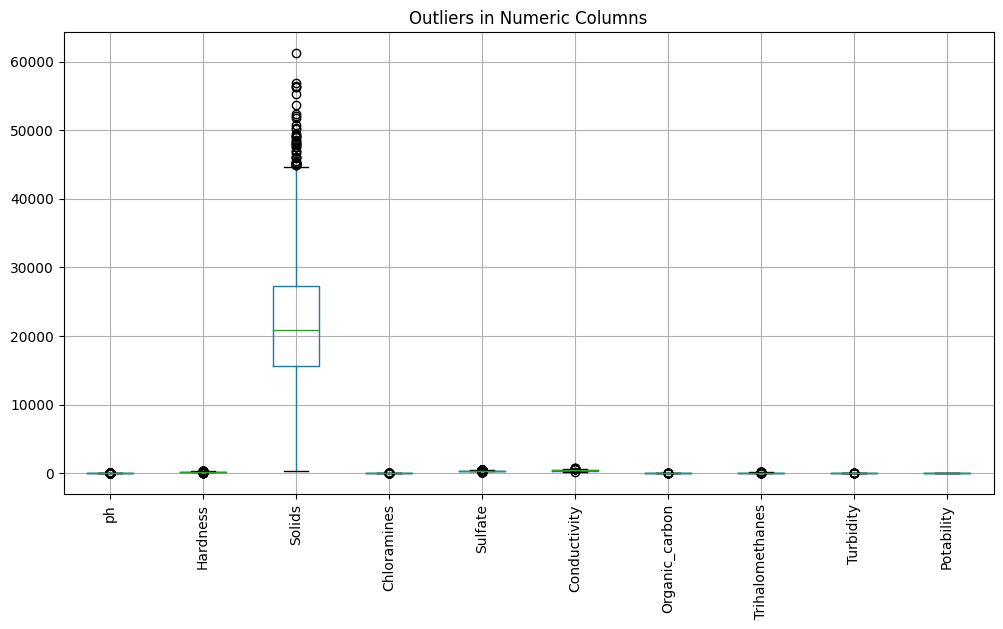

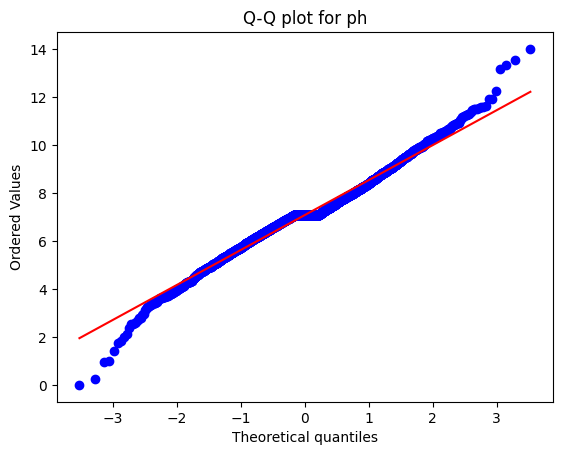

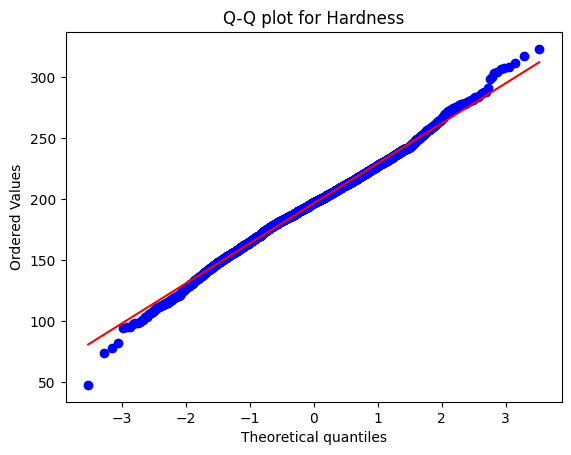

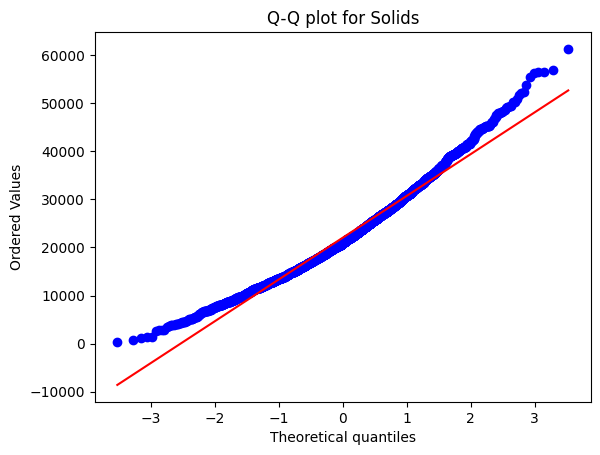

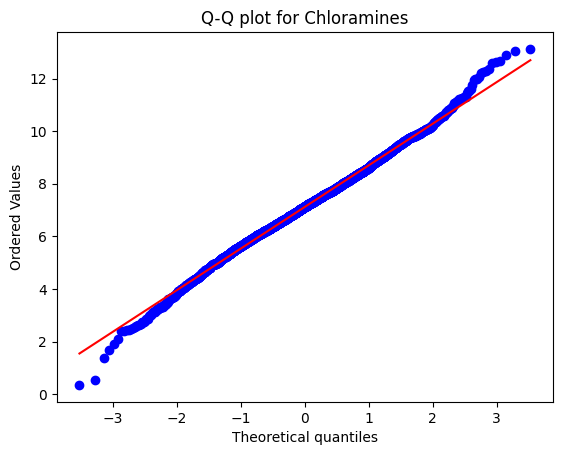

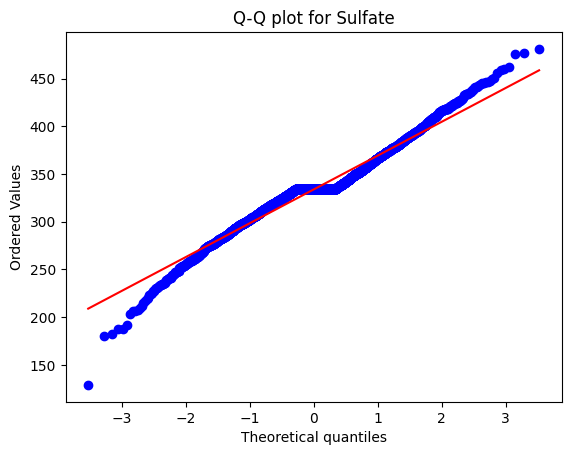

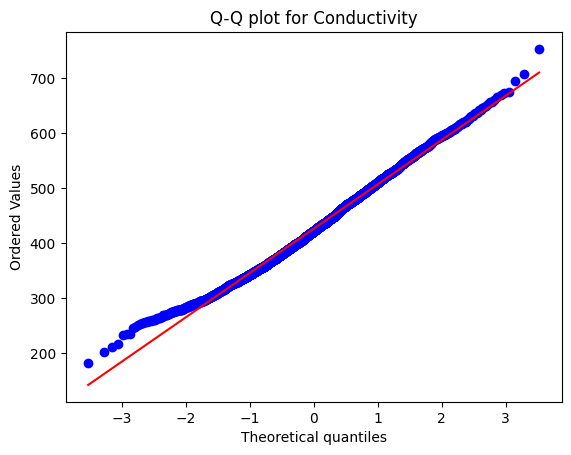

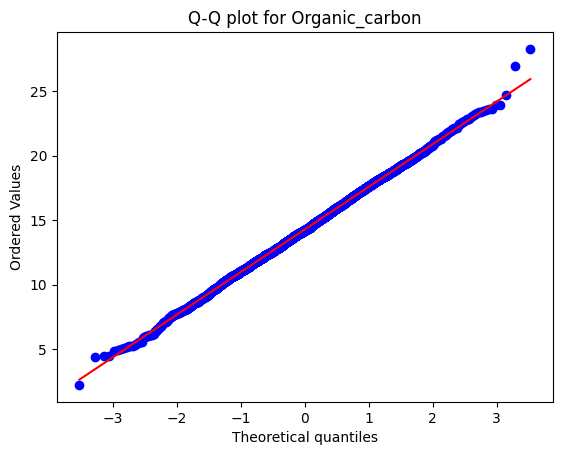

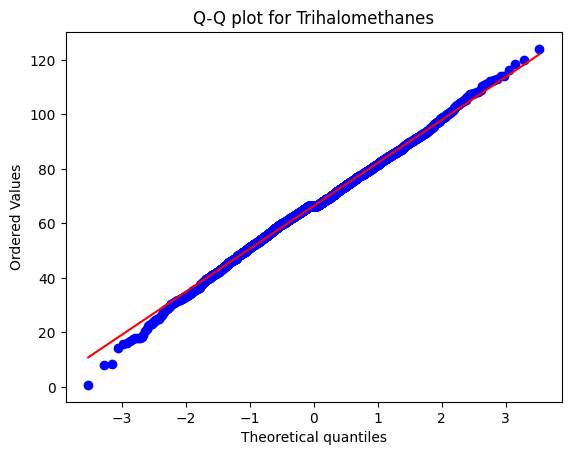

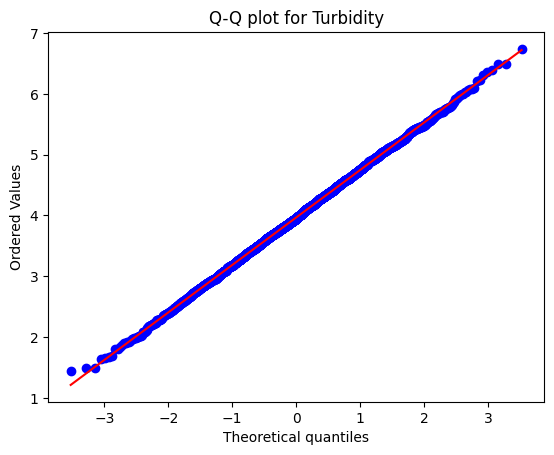

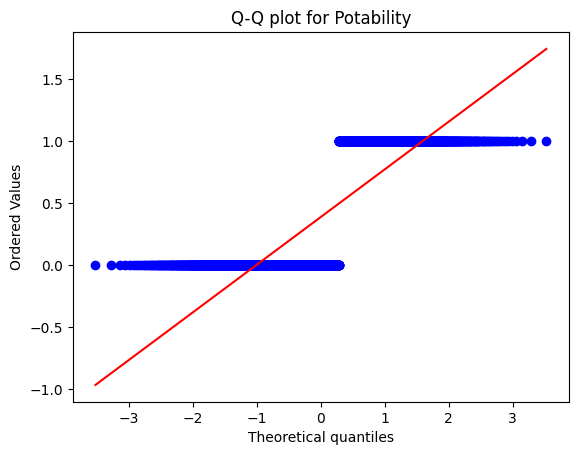

ph: Shapiro-Wilk Test p-value = 3.998631951443975e-21
Hardness: Shapiro-Wilk Test p-value = 9.609728989065804e-08
Solids: Shapiro-Wilk Test p-value = 2.951167378434706e-22
Chloramines: Shapiro-Wilk Test p-value = 1.818108595864286e-06
Sulfate: Shapiro-Wilk Test p-value = 2.0198788405291018e-29
Conductivity: Shapiro-Wilk Test p-value = 1.4941543180956387e-11
Organic_carbon: Shapiro-Wilk Test p-value = 0.6251250420353538
Trihalomethanes: Shapiro-Wilk Test p-value = 4.176881265193894e-06
Turbidity: Shapiro-Wilk Test p-value = 0.9335787571507876
Potability: Shapiro-Wilk Test p-value = 5.64280011989497e-65


In [44]:
# Next Step in analyzing the data
# Data Quality Assessment
from scipy.stats import shapiro, probplot  # Ensure probplot is correctly imported

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Check for outliers using boxplots
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.boxplot(figsize=(12, 6), rot=90)
plt.title("Outliers in Numeric Columns")
plt.show()

# Check normality using Q-Q plots
for column in df_numeric.columns:
    probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

# Normality test using Shapiro-Wilk Test
for column in df_numeric.columns:
    stat, p_value = shapiro(df[column].dropna())
    print(f"{column}: Shapiro-Wilk Test p-value = {p_value}")

In [45]:
#Further Hypothesis Testing
from scipy import stats

# Hypothesis: Is there a correlation between Hardness and Potability?
hardness_potable = df[df['Potability'] == 1]['Hardness']
hardness_non_potable = df[df['Potability'] == 0]['Hardness']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(hardness_potable, hardness_non_potable)

# Output the result
print(f"Ttest_indResult(statistic={t_stat}, pvalue={p_value})")

# Interpret the result
if p_value < 0.05:
    print("We reject the null hypothesis, indicating a significant difference in Hardness between potable and non-potable water.")
else:
    print("We fail to reject the null hypothesis, indicating no significant difference in Hardness between potable and non-potable water.")

Ttest_indResult(statistic=-0.7917881267437834, pvalue=0.42854158740864634)
We fail to reject the null hypothesis, indicating no significant difference in Hardness between potable and non-potable water.


In [46]:
#Building a Predictive Model for Potability
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the features and target variable
X = df.drop(columns=['Potability'])
y = df['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy of the model: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Accuracy of the model: 0.6927772126144456
Confusion Matrix:
[[548  69]
 [233 133]]
Feature Importances:
ph                 0.126001
Sulfate            0.122695
Hardness           0.120272
Chloramines        0.118358
Solids             0.114760
Organic_carbon     0.102218
Conductivity       0.100721
Trihalomethanes    0.097723
Turbidity          0.097252
dtype: float64


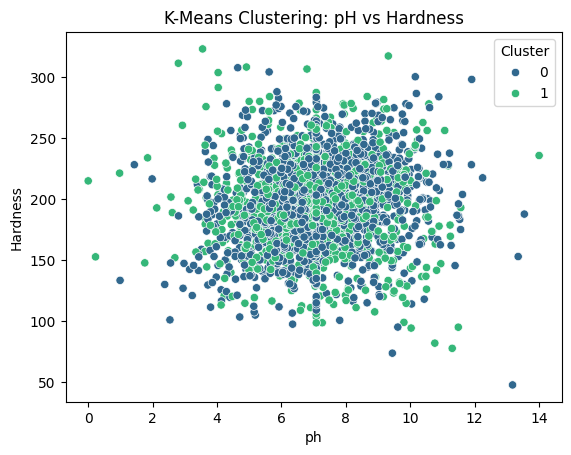

In [47]:
# Clustering Analysis
from sklearn.cluster import KMeans

# Apply KMeans clustering to the data (excluding 'Potability')
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(data=df, x='ph', y='Hardness', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering: pH vs Hardness")
plt.show()
